<a href="https://colab.research.google.com/github/Thefernan122/Prestamos_Digitales/blob/main/Pr%C3%A9stamos_Digitales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving dataBasePrestDigital.csv to dataBasePrestDigital.csv


In [4]:
import pandas as pd

df = pd.read_csv('dataBasePrestDigital.csv')
print(df.head())


  mes;cliente;estadoCliente;rngEdad;genero;rngSueldo;procedencia;operDigital;trxDigitalUm;promTrxDig3Um;recCamp;frecCamp;tenTarjeta;promConsBanco3Um;promSaldoBanco3Um;promSaldoTc3Um;promSaldoPrest3Um;sowTcUm;sowPrestUm;ventaPrestDig
0  201608;1;A;<35-45];M;<3500-4500];lima;NN;0;0;1...                                                                                                                                                                                    
1  201608;2;A;<25-35];M;<3500-4500];lima;BXI-BM;2...                                                                                                                                                                                    
2  201608;3;A;<35-45];F;<4500-6000];lima;BM;407;3...                                                                                                                                                                                    
3  201608;4;A;<25-35];F;<3500-4500];lima;NN;0;0;1...                

In [8]:
import pandas as pd

df = pd.read_csv('dataBasePrestDigital.csv', sep=';')
print(df.head())
print(df.info())
print(df.columns.tolist())
# Seleccionamos 'trxDigitalUm' como variable predictora (número de transacciones digitales)
X = df[['trxDigitalUm']]
y = df['ventaPrestDig']


      mes  cliente estadoCliente  rngEdad genero    rngSueldo procedencia  \
0  201608        1             A  <35-45]      M  <3500-4500]        lima   
1  201608        2             A  <25-35]      M  <3500-4500]        lima   
2  201608        3             A  <35-45]      F  <4500-6000]        lima   
3  201608        4             A  <25-35]      F  <3500-4500]        lima   
4  201608        5             A  <35-45]      F       <=1000        lima   

  operDigital  trxDigitalUm  promTrxDig3Um  recCamp  frecCamp tenTarjeta  \
0          NN             0       0.000000        1         3      TC-TD   
1      BXI-BM           200     192.666667        1         3      TC-TD   
2          BM           407     332.333333        1         3         TD   
3          NN             0       0.000000        1         1         NN   
4          NN             0       0.000000        1         1         TD   

   promConsBanco3Um  promSaldoBanco3Um  promSaldoTc3Um  promSaldoPrest3Um  \
0  

In [9]:
import pandas as pd

# Cambia el nombre del archivo si es necesario
df = pd.read_csv('dataBasePrestDigital.csv', sep=';')

# Primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Información general
print("\nInformación del dataset:")
print(df.info())

# Nombres de columnas
print("\nColumnas disponibles:")
print(df.columns.tolist())


Primeras filas del dataset:
      mes  cliente estadoCliente  rngEdad genero    rngSueldo procedencia  \
0  201608        1             A  <35-45]      M  <3500-4500]        lima   
1  201608        2             A  <25-35]      M  <3500-4500]        lima   
2  201608        3             A  <35-45]      F  <4500-6000]        lima   
3  201608        4             A  <25-35]      F  <3500-4500]        lima   
4  201608        5             A  <35-45]      F       <=1000        lima   

  operDigital  trxDigitalUm  promTrxDig3Um  recCamp  frecCamp tenTarjeta  \
0          NN             0       0.000000        1         3      TC-TD   
1      BXI-BM           200     192.666667        1         3      TC-TD   
2          BM           407     332.333333        1         3         TD   
3          NN             0       0.000000        1         1         NN   
4          NN             0       0.000000        1         1         TD   

   promConsBanco3Um  promSaldoBanco3Um  promSaldoTc3

In [10]:
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
mes                  0
cliente              0
estadoCliente        0
rngEdad              0
genero               0
rngSueldo            0
procedencia          0
operDigital          0
trxDigitalUm         0
promTrxDig3Um        0
recCamp              0
frecCamp             0
tenTarjeta           0
promConsBanco3Um     0
promSaldoBanco3Um    0
promSaldoTc3Um       0
promSaldoPrest3Um    0
sowTcUm              0
sowPrestUm           0
ventaPrestDig        0
dtype: int64


In [11]:
# Asegurar que columnas clave sean numéricas
columnas_numericas = [
    'trxDigitalUm', 'promTrxDig3Um', 'promConsBanco3Um', 'promSaldoBanco3Um',
    'promSaldoTc3Um', 'promSaldoPrest3Um', 'sowTcUm', 'sowPrestUm', 'ventaPrestDig'
]

# Convertimos y reemplazamos errores por NaN (por seguridad)
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminamos filas con valores faltantes
df.dropna(subset=columnas_numericas, inplace=True)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


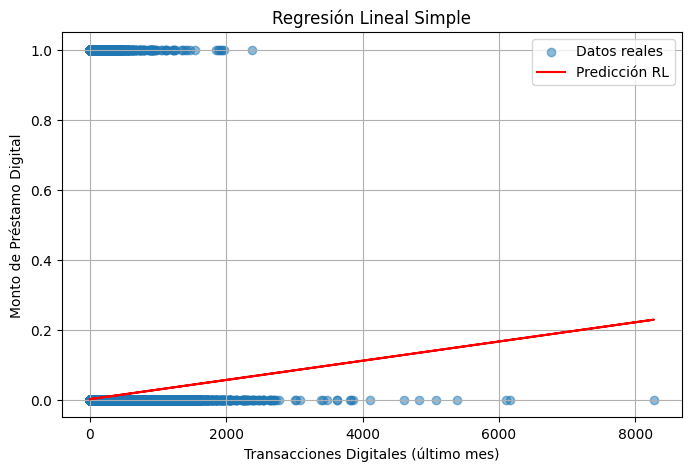

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Variables
X = df[['trxDigitalUm']]
y = df['ventaPrestDig']

# Modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X, y)

# Predicciones
y_pred = modelo_rl.predict(X)

# Gráfico
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.5, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Predicción RL')
plt.xlabel('Transacciones Digitales (último mes)')
plt.ylabel('Monto de Préstamo Digital')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Lista de columnas seleccionadas
columnas_usar = [
    'trxDigitalUm',
    'promTrxDig3Um',
    'promSaldoPrest3Um',
    'promSaldoBanco3Um',
    'sowTcUm',
    'sowPrestUm'
]

# Nos aseguramos de que también esté la columna objetivo
columnas_usar.append('ventaPrestDig')

# Crear nuevo DataFrame con solo esas columnas
df_nn = df[columnas_usar].copy()

# Eliminar filas con valores nulos
df_nn.dropna(inplace=True)

# Verificar que todo esté limpio
print("Dimensiones del dataset limpio:", df_nn.shape)
df_nn.head()


Dimensiones del dataset limpio: (435083, 7)


,trxDigitalUm,promTrxDig3Um,promSaldoPrest3Um,promSaldoBanco3Um,sowTcUm,sowPrestUm,ventaPrestDig
0,0,0.000000,0.0,5844.17,1.0,0,0
1,200,192.666667,0.0,0.00,0.0,0,0
2,407,332.333333,0.0,0.00,0.0,0,0
3,0,0.000000,0.0,67.67,1.0,0,0
4,0,0.000000,0.0,0.00,0.0,0,0


from matplotlib import pyplot as plt
_df_31['trxDigitalUm'].plot(kind='hist', bins=20, title='trxDigitalUm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['promTrxDig3Um'].plot(kind='hist', bins=20, title='promTrxDig3Um')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['promSaldoBanco3Um'].plot(kind='hist', bins=20, title='promSaldoBanco3Um')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['sowTcUm'].plot(kind='hist', bins=20, title='sowTcUm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='trxDigitalUm', y='promTrxDig3Um', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='promTrxDig3Um', y='promSaldoBanco3Um', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='promSaldoBanco3Um', y='sowTcUm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['promSaldoPrest3Um']
  ys = series['trxDigitalUm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('promSaldoPrest3Um', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('promSaldoPrest3Um')
_ = plt.ylabel('trxDigitalUm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['promSaldoPrest3Um']
  ys = series['promTrxDig3Um']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('promSaldoPrest3Um', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('promSaldoPrest3Um')
_ = plt.ylabel('promTrxDig3Um')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['promSaldoPrest3Um']
  ys = series['promSaldoBanco3Um']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('promSaldoPrest3Um', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('promSaldoPrest3Um')
_ = plt.ylabel('promSaldoBanco3Um')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['promSaldoPrest3Um']
  ys = series['sowTcUm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('promSaldoPrest3Um', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('promSaldoPrest3Um')
_ = plt.ylabel('sowTcUm')

from matplotlib import pyplot as plt
_df_42['trxDigitalUm'].plot(kind='line', figsize=(8, 4), title='trxDigitalUm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['promTrxDig3Um'].plot(kind='line', figsize=(8, 4), title='promTrxDig3Um')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['promSaldoBanco3Um'].plot(kind='line', figsize=(8, 4), title='promSaldoBanco3Um')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['sowTcUm'].plot(kind='line', figsize=(8, 4), title='sowTcUm')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separar variables predictoras (X) y variable objetivo (y)
X = df_nn.drop('ventaPrestDig', axis=1)
y = df_nn['ventaPrestDig']

# Normalizar las variables X
escalador = MinMaxScaler()
X_normalizado = escalador.fit_transform(X)

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)

# Verificar dimensiones
print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)


Entrenamiento: (348066, 6)
Prueba: (87017, 6)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
modelo = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # capa oculta con 32 neuronas
    Dense(16, activation='relu'),                                   # otra capa oculta
    Dense(1, activation='linear')                                   # salida continua
])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
historial = modelo.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.0027 - mae: 0.0063 - val_loss: 0.0025 - val_mae: 0.0057
Epoch 2/50
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0028 - mae: 0.0061 - val_loss: 0.0025 - val_mae: 0.0083
Epoch 3/50
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0030 - mae: 0.0063 - val_loss: 0.0025 - val_mae: 0.0043
Epoch 4/50
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0028 - mae: 0.0061 - val_loss: 0.0025 - val_mae: 0.0058
Epoch 5/50
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0029 - mae: 0.0062 - val_loss: 0.0025 - val_mae: 0.0076
Epoch 6/50
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0028 - mae: 0.0058 - val_loss: 0.0025 - val_mae: 0.0075
Epoch 7/50
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.0027 - mae: 0.0058 - val_loss: 0.0025 - val_mae: 0.0043
Epoch 8/50
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.0030 - mae: 0.0066 - val_loss: 0.0025 - val_mae: 0.0040
Epoch 9/50
8702/8702 ━━━━━━━━━━━

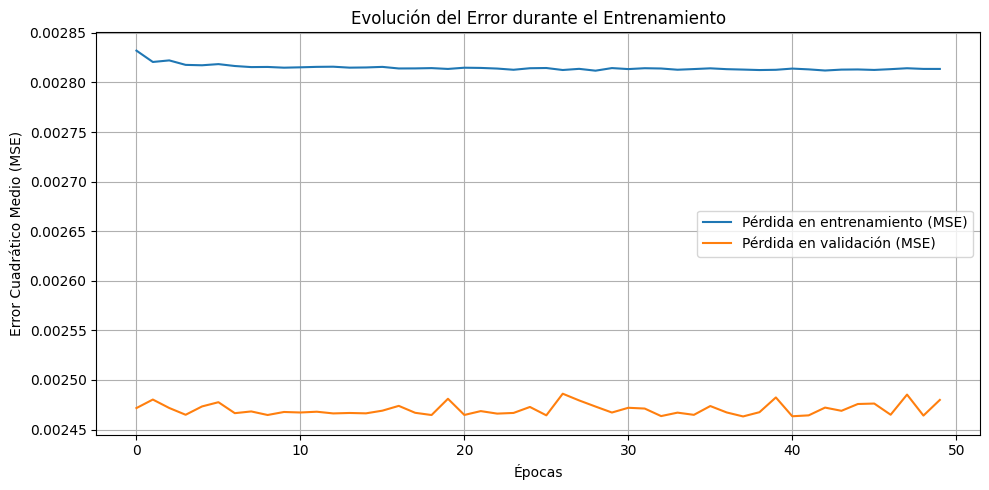

In [20]:
import matplotlib.pyplot as plt

# Gráfico del loss y mae
plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Pérdida en entrenamiento (MSE)')
plt.plot(historial.history['val_loss'], label='Pérdida en validación (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2720/2720 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


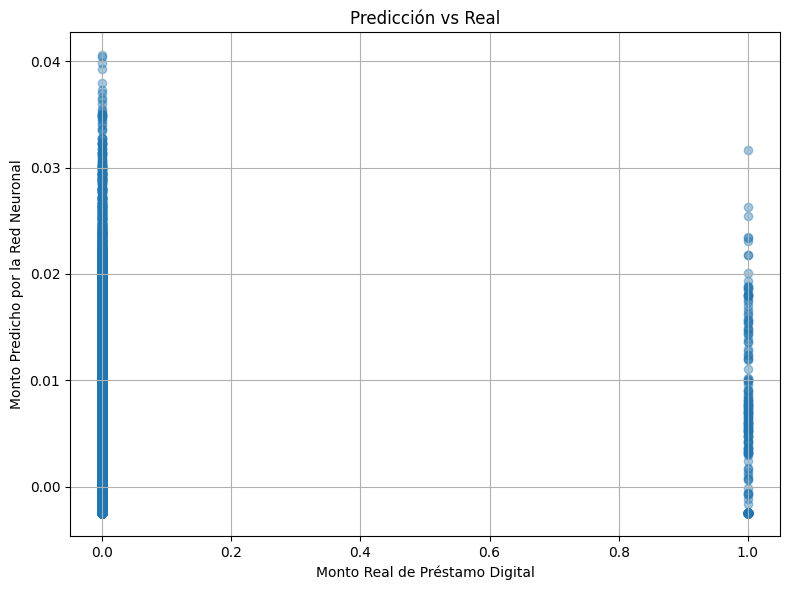

In [21]:
# Predicción sobre el set de prueba
y_pred_nn = modelo.predict(X_test).flatten()

# Graficar valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.4)
plt.xlabel('Monto Real de Préstamo Digital')
plt.ylabel('Monto Predicho por la Red Neuronal')
plt.title('Predicción vs Real')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Lista de errores absolutos
errores = []

# Diccionario para contar cuántos valores predichos caen en cierto rango
conteo = {'<0.01': 0, '0.01-0.02': 0, '>0.02': 0}

# Bucle con condición
for real, pred in zip(y_test, y_pred_nn):
    error = abs(real - pred)
    errores.append(error)

    if error < 0.01:
        conteo['<0.01'] += 1
    elif error < 0.02:
        conteo['0.01-0.02'] += 1
    else:
        conteo['>0.02'] += 1

# Mostrar resumen
print("Errores medios:", sum(errores)/len(errores))
print("Distribución de errores:", conteo)


Errores medios: 0.006121723
Distribución de errores: {'<0.01': 83254, '0.01-0.02': 2938, '>0.02': 825}
